In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file with encoding specified
file_path = '/content/IL_data.csv'  # Update this if your file path is different

# Try loading with different encodings to handle potential issues
try:
    data = pd.read_csv(file_path, encoding='utf-8')  # Default encoding
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Fallback encoding

def filter_dataframe(df):
    """
    Filters the DataFrame based on the following conditions and drops null values:
    1. (nperps >= 0 and nkill >= 0)
    2. (nperps >= 0 and nwound >= 0)
    3. (nperps >= 0 and nwound >= 0)

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A new DataFrame with three columns ('nperps', 'nkill', 'nwound') filtered based on the specified conditions and without null values.
    """
    filtered_df = df[
        (df['nperps'] >= 0) & (df['nkill'] >= 0) |
        (df['nperps'] >= 0) & (df['nwound'] >= 0) |
        (df['nperps'] >= 0) & (df['nwound'] >= 0)
    ][['nperps', 'nkill', 'nwound']].copy()
    filtered_df = filtered_df.dropna()

    # Rename columns
    filtered_df = filtered_df.rename(
        columns={
            'nperps': 'Terrorists',
            'nkill': 'Deaths',
            'nwound': 'Injuries'
        }
    )
    return filtered_df

# Assuming 'data' is your DataFrame
data = filter_dataframe(data)
print(data.head(5))

    Terrorists  Deaths  Injuries
1          5.0    26.0      72.0
16         1.0     2.0      18.0
21         3.0    25.0      70.0
22         4.0     7.0       0.0
24         3.0     7.0       5.0


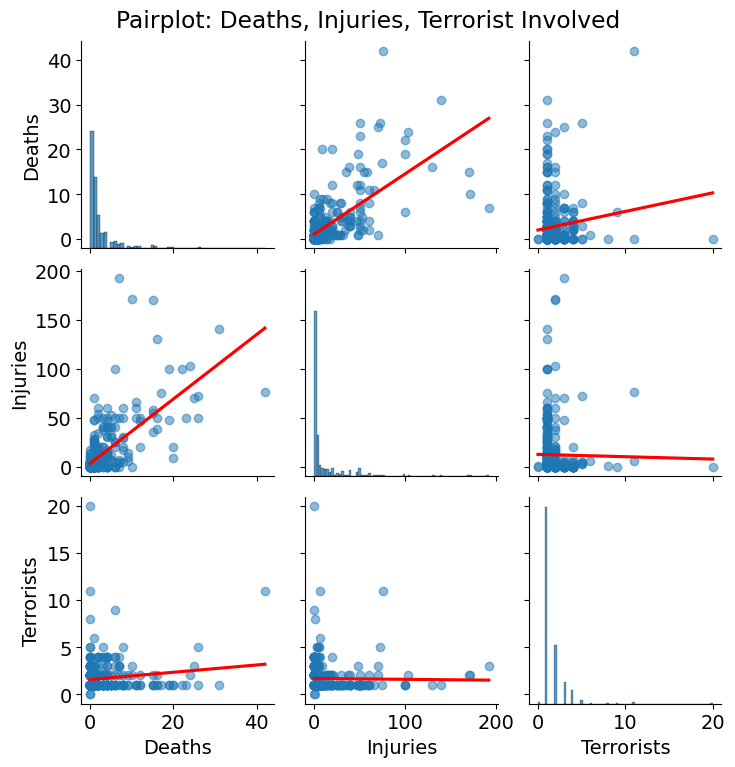

In [2]:
def plot_pairplot(df):
    """
    Plots a pairplot for the selected columns of the DataFrame, reordered for better visualization.

    Parameters:
    df (pd.DataFrame): The input DataFrame with the columns ('Lives Loss', 'Injuries', 'Terrorist Involved').
    """
    # Define the order of columns
    reordered_columns = ['Deaths', 'Injuries', 'Terrorists']
    plt.rcParams['font.size'] = 14  # Set the desired font size

    # Plot the pairplot with the reordered columns
    sns.pairplot(
        df[reordered_columns],
        kind="reg",
        diag_kind="hist",
        plot_kws={
            'line_kws': {'color': 'red'},  # Customize regression line color
            'scatter_kws': {'alpha': 0.5},  # Scatter customization
            'ci': None  # Disable confidence interval shadow
        }
    )
    plt.suptitle( 'Pairplot: Deaths, Injuries, Terrorist Involved', y=1.02)
    plt.show()

# Call the function with the reordered columns
plot_pairplot(data)


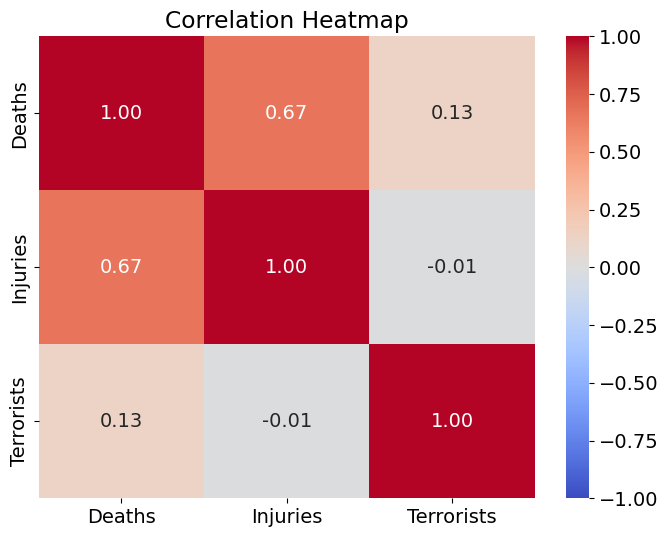

In [3]:
# Heatmap of correlations between 'Terrorist Involved', 'Lives Loss', and 'Injuries'
correlation_matrix = data[['Deaths', 'Injuries', 'Terrorists']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()